# BIOL-187,  Test 2: James Lawson

<font size = '5' color='Red'>
Final score: 55/60
</font>

**Directions:**

Please compose your code in the appropirate Jupyter Notebook cell below the problem desription.

**Exam Policies:**

   - You can use any written resources for this text, however you ARE NOT allowed to discuss verbally this exam with anybody until the end of exam period.
    
   - If your code does not produce any output due to errors, your grade for that section will be reduced by 100%.

   - To get full credit for this problem, your code should produce a neat and informative output, clear graph, or written summary. Depending on the problem, you will be ask to produce either informative printout or a type a conclusion. See specific details of printout/conclusion in the individual problem descriptions.

   - For each question requesting a graph, make sure to label the graph axes (including units, if appropriate), and provide legends and titles. Make all legends and labels legibly large.

   -  To get full credit for the test, all data frame manipulations have to be done algorithmially. Please avoid making any changes to the original happy.csv file, such as making a new data files or copy/paste/edit-ing any data manually.

# Data

For this test you will use the file **happy.csv** provided as an attachment to this exam. The file contains data on several socio-economical scores calculated for a number of counries in 2019. It is extracted from the [World Happiness report](http://worldhappiness.report/) Each country's Happiness Score is calculated by summing seven variables in the table. Each of these variables reveals a population-weighted average score on a scale running from 0 to 10, that is tracked over time and compared against other countries.

These variables are:

   - **Economy**: real GDP per capita
   - **Family**: social support, as measured by having someone to count on in times of trouble
   - **Health**: healthy life expectancy
   - **Freedom**: freedom to make life choices
   - **Corruption**: as measured by a perceived absence of corruption in government and business
   - **Generosity**: as measured by recent donations
   - **Dystopia**: benchmark country corresponding to the lowest possible values in each of the criteria

Each country's **Happiness Score** determines its **Happiness Rank** - which is its relative position among other countries in that specific year. For example, the first row indicates that Norway was ranked the happiest country in 2019 with a happiness score of 7.537. Norway was ranked first just before Denmark, which scored 7.52.

## Problem 1:  Preliminary exploration of happiness dataset

Import the data into a dataframe without specifying an index column. Arrange the countries by their happiness score (highest first). Display all of the data for the 10 happiest countries in the dataset.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data frame is loaded into df
df = pd.read_csv('happy.csv')

#data is sorted according to happiness score
dfSorted = df.sort_values(by =['total_happiness'],ascending = False)

#first 10 rows are printed
display(dfSorted.head(10))

,country,ranking,total_happiness,economy,family,health,freedom,generosity,corruption,dystopia,job_satisfaction,region
48,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
16,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
77,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
87,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
127,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
78,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
33,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
135,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
85,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe
69,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


## Conclusion 1:

*Do you observe any trends in your data? Describe these trends in 1-2 sentences.*


All of these countries are either in Western Europe, North America, or Asia-Pacific. Additionally, the first three countries are very close geographically to one another. 

# Problem 2: Does freedom make people happy?

The index **freedom** in the dataset quanitfies the ability of the citizen of a given country to make life choices. Such freedom can vary significantly, as indicated by the wide range of values within this column. We can separate countries depending on the level of freedom (i.e., 'free' or 'restricted'), and analyze the distribution of happiness scores in each category.

Introduce a new boolean variable **is_free** in your datafrme. The value of this variable will be **True** if **Freedom>0.4** and **False** if **Freedom<=0.4**

Display the first five rows of the DataFrame.

In [2]:
# Create a new boolean column called df.elderly where the value is True if df.freedom is greater than .4 and False if not
df['is_free'] = np.where(df['freedom']>.4, True, False)

#first 5 rows are displayed
display(df.head(5))

,country,ranking,total_happiness,economy,family,health,freedom,generosity,corruption,dystopia,job_satisfaction,region,is_free
0,Kyrgyzstan,98,5.004,0.596220,1.394239,0.553458,0.454943,0.428580,0.039439,1.536723,76.0,Asia-Pacific,True
1,Ukraine,132,4.096,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,72.3,Europe,False
2,Austria,13,7.006,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506,95.1,Western Europe,True
3,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa,True
4,South Africa,101,4.829,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909,61.3,Africa,True


Plot separate histograms of total happiness scores for the free and restricted countries. These should be plotted as two subplots. Each subplot should have its own x- and y-axis labels, and its own title. Make sure that the histogram range for both subplots is the same to allow honest comparisons between your data.

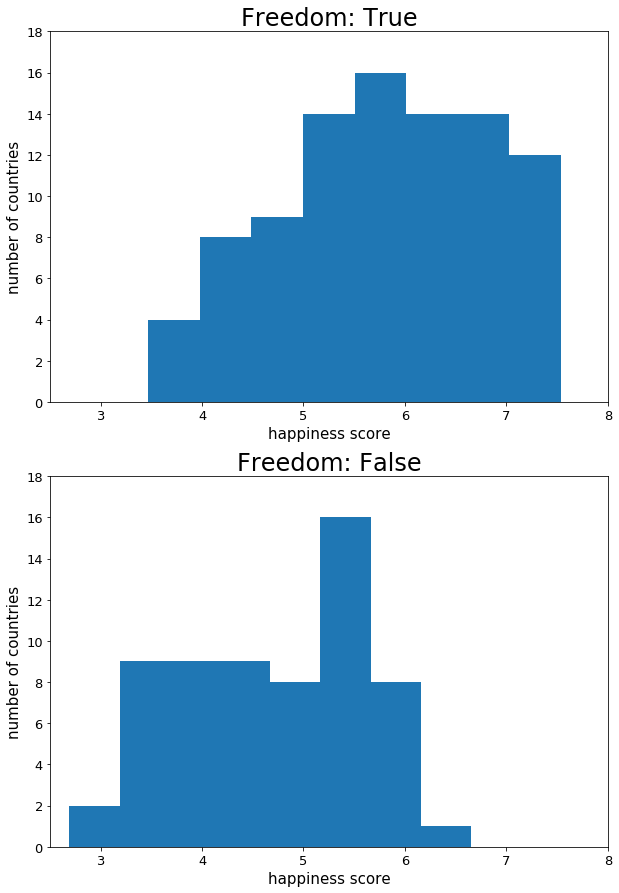

In [3]:
#figure size is set
plt.figure(figsize = (10, 15))

#count is set to 1
count = 1

#unique freedom variable is set
unique_freedom = df.is_free.unique()

for x in unique_freedom:
    new_df = df[df.is_free == x]
    #new subdata frames with continents
    plt.subplot(2,1,count)
    total_happiness = new_df['total_happiness']
    plt.hist(total_happiness, bins = 8)
    count = count + 1
        
    #title is added
    plt.title("Freedom: "+ str(x), fontsize = 24)
        
    #x and y limits are set
    plt.ylim(0, 18)
    plt.xlim(2.5, 8)

    #x and y ticks are set
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    #axix labels
    plt.xlabel('happiness score', fontsize=15)
    plt.ylabel('number of countries', fontsize=15)

#plot is shown
plt.show()

<font size = '5' color='Red'>
When plotting stacked histograms, you need to specify a range() argument within your plt.hist() function so that all histograms will plot bins using the same start and end point. This allows for a more honest comparison between the distributions.

2 points
</font>

## Conclusion 2:

*Have you observed any trend(s) in distribution of happiness scores between countries with high and low degree of freedom to make life choices? Describe your observations in 1-3 sentences.*

Generally, countries with a freedom index above .4 tend to have higher happiness scores when compared to countries with a freedom index below .4

# Problem 3: What made countries happy in 2019?

Let's try to explore what contributes to the overall happiness of a country by exploring several parameters in our dataset. Make a scatterplot with the GDP score on the x-axis and health score on the y-axis for all countries in the dataset in the year 2015. Use circular markers, **and make the size of each marker proportional to the happiness ranking of each individual country** (since the best ranking is 1, this should result in the happiest countries having the smallest marker), and use separate colors to represent each region. Include a legend containing the list of each region **(you must do this the same way we did in lab, algorithmically using a for loop rather than typing out your own list of the different regions)**. Provide informative axis labels, a title, and make all font sizes and the figure size large enough for all text to be legible. **Export a copy of your figure to the file name 'happiness_[put your last name here].jpg'.**

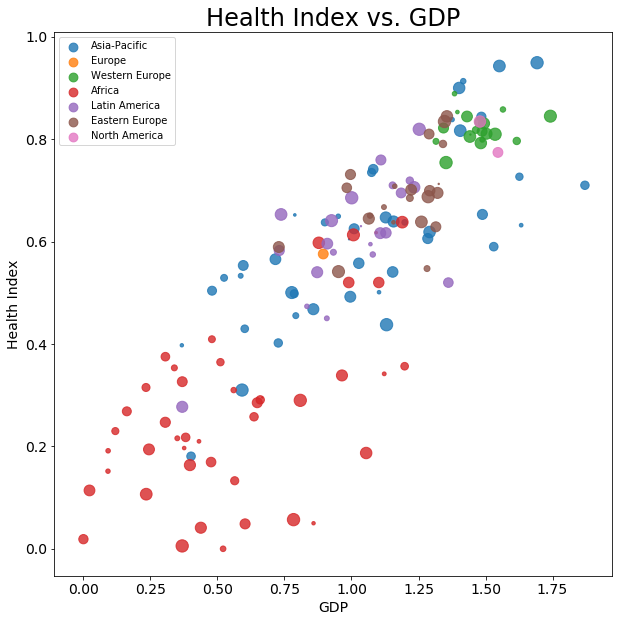

In [4]:
#figure size is changed to a 10" x 10"
plt.figure(figsize=(10,10)) 

#new variable is created with unique()
unique = df.region.unique()

#scatterplots are created
for thing in unique:
    new_df = df[df.region == thing]
    plt.scatter(new_df.economy, new_df.health, label = thing, marker="o", s=df.ranking, alpha=.8)

#legend
plt.legend(loc="best")

#title is added
plt.title("Health Index vs. GDP", fontsize=24)

#x and y labels are added
plt.ylabel("Health Index", fontsize=14)
plt.xlabel("GDP", fontsize=14)

#tick sizes are changed
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#export a copy of the figure
plt.savefig('happiness_Lawson.jpg')

#scatterplot is displayed
plt.show()

<font size = '5' color='Red'>
You use the original whole dataframe for your dot sizes, instead of filtering to just the correct region using df_new. Same below.

-3 points
</font>

## Conclusion 3:

*Do you observe any trend(s)? In 1-3 sentences describe the observed relationship between GDP per capita, Life expectancy and happiness rank within different regions*

There is a general linear upward trend with the association of GDP and Health Index. Additionally, African countries generally have lower GDPs and Heal Indexe scores when compared to other regions. Additionally, Western European countries tend to have higher GDPs and Health Index scores when compared to other regions.

# Problem 4: Freeform exploratory data analysis

An important part of being a data scientist is being able to explore a data and seek out interesting patterns in the data without specific prompting or direction.

Choose a different set of three different variables from our DataFrame to plot in a similar manner to what we did in Problem 3. You should still separate the countries by region, but you can choose your own variables for the x-axis, y-axis, and marker sizing.

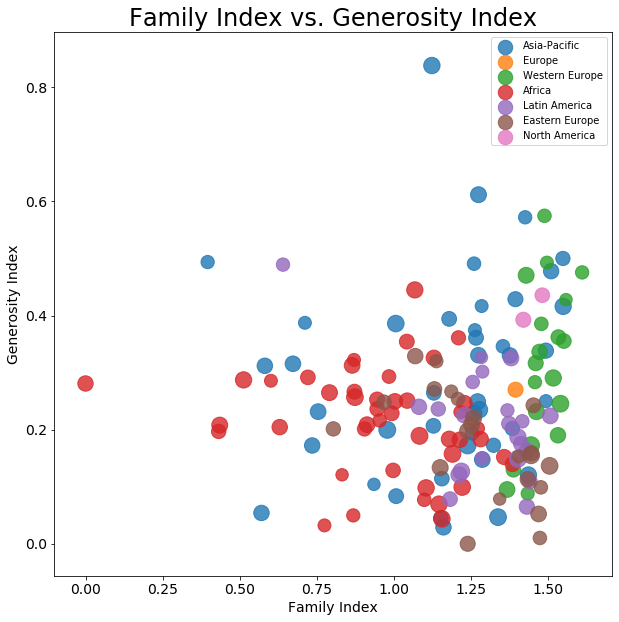

In [5]:
#figure size is changed to a 10" x 10"
plt.figure(figsize=(10,10)) 

#new variable is created with unique()
unique = df.region.unique()

#scatterplots are created
for thing in unique:
    new_df = df[df.region == thing]
    plt.scatter(new_df.family, new_df.generosity, label = thing, marker="o", s=df.job_satisfaction*3, alpha=.8)

#legend
plt.legend(loc="best")

#title is added
plt.title("Family Index vs. Generosity Index", fontsize=24)

#x and y labels are added
plt.ylabel("Generosity Index", fontsize=14)
plt.xlabel("Family Index", fontsize=14)

#tick sizes are changed
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#scatterplot is displayed
plt.show()

# Conclusion 4:

*Do you observe any trend(s)? In 1-3 sentences describe the observed relationships between your chosen variables.*

One observation is that there is not a large relative difference in the job satisfaction across countries. Another observation is that Western Europe generally has a higher family index when compared to other regions.